
-----

# **`Python For Beginners`**

## **Author: Muhammad Adil Naeem**
## **Contact Me: `madilnaeem@gmail.com`**


------


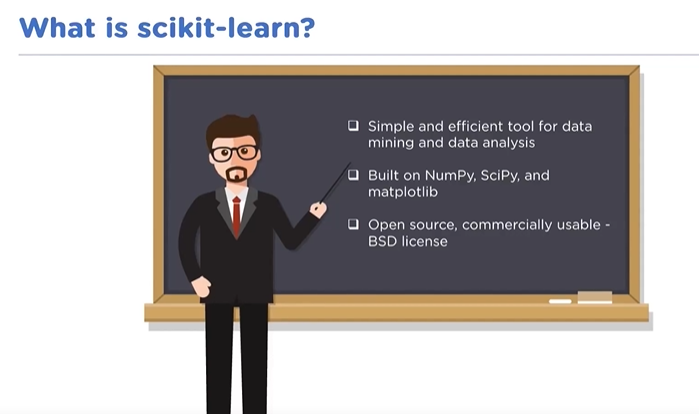

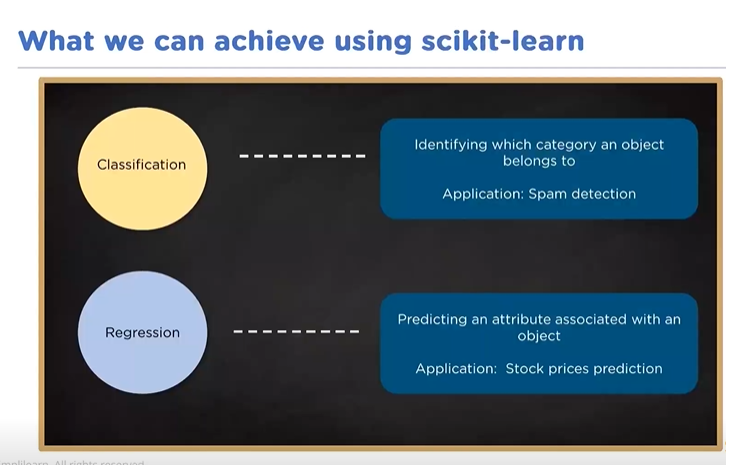

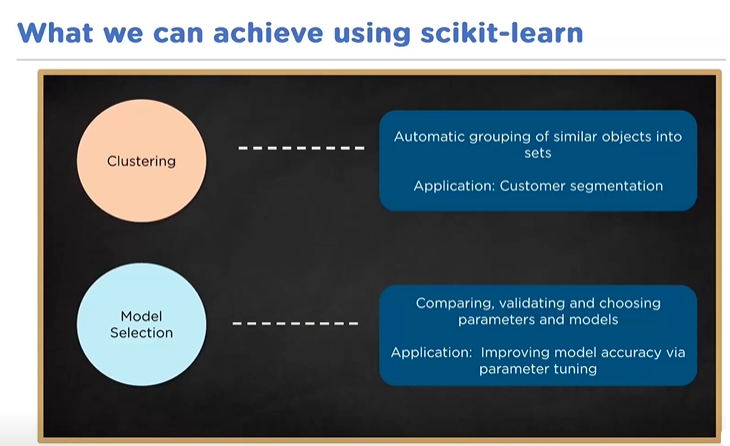

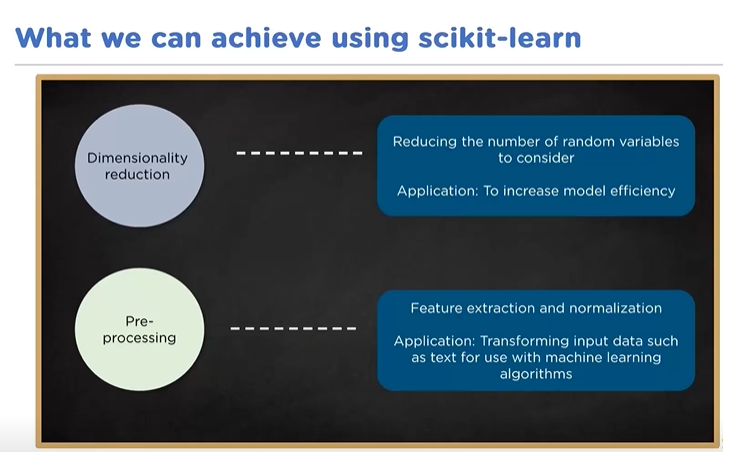

### **`Scikit-learn in Python`**

##### **Importing Libraries**

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

#### **Load wine dataset**

In [17]:
wine = pd.read_csv(r"E:\Simplilearn Python For Beginners\11_scikit-learn_in_python_for_machine_learning\data\winequality-red.csv")

#### **First 5 Rows of Dataset**

In [18]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### **Information of Dataset**

In [19]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### **Check Missing Values**


In [20]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### **Data Pre-Processing**

In [21]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names) # bad = 0, good = 1
wine['quality'].value_counts()

quality
bad     1382
good     217
Name: count, dtype: int64

#### **Encoding Labels**

In [22]:
labelencoder = LabelEncoder()

wine['quality'] = labelencoder.fit_transform(wine['quality'])

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [23]:
wine['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

#### **Count Plot of Wine Quality**

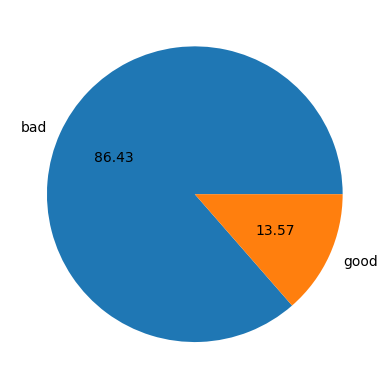

In [29]:
plt.pie(wine['quality'].value_counts(), labels = ['bad', 'good'], autopct = '%0.2f')
plt.show()

#### **Separate the data as response variable and feature variable**

In [30]:
X = wine.drop('quality',axis=1)
y = wine['quality']

#### **Splitting the dataset into the Training set and Test set**

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### **Standardizing the data**

In [32]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # no need to fit because we are using the same scaler

In [37]:
X_train # transformed data

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

#### **Training the Random Forest Classifier on the Training set**

In [38]:
rfc = RandomForestClassifier(n_estimators=250)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

#### **Random Forest Classifier Model Evaluation**

In [39]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       273
           1       0.77      0.51      0.62        47

    accuracy                           0.91       320
   macro avg       0.85      0.74      0.78       320
weighted avg       0.90      0.91      0.90       320



[[266   7]
 [ 23  24]]


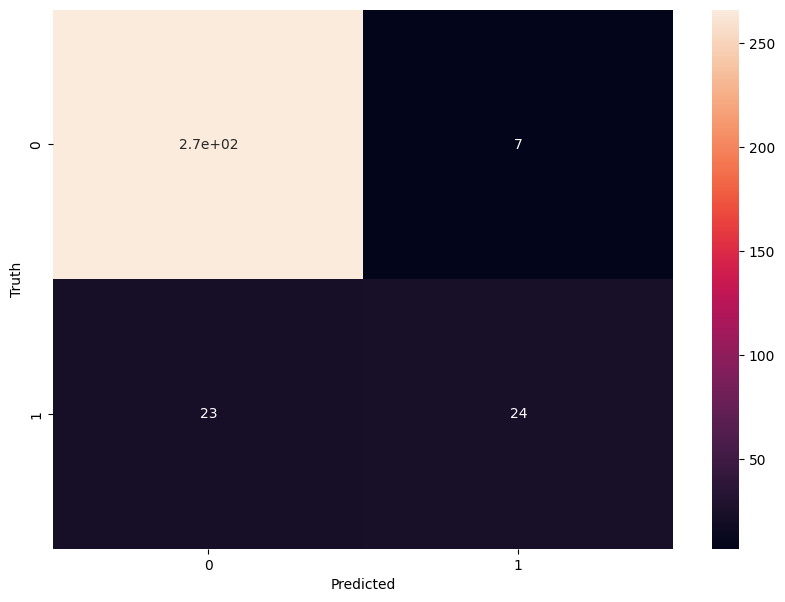

In [41]:
# plot confusion matrix
print(confusion_matrix(y_test, pred_rfc))
cm = confusion_matrix(y_test, pred_rfc)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

#### **Support Vector Classifier**

In [42]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [43]:
print(classification_report(y_test, pred_svc))
print(confusion_matrix(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.38        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


#### **Neural Network**

In [44]:
mlpc  = MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500) # 11,11,11 is the model complexity
mlpc.fit(X_train,y_train)
pred_mlpc = mlpc.predict(X_test)

c:\Users\user\miniconda3\envs\eda_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [45]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       273
           1       0.60      0.45      0.51        47

    accuracy                           0.88       320
   macro avg       0.75      0.70      0.72       320
weighted avg       0.86      0.88      0.87       320

[[259  14]
 [ 26  21]]
